NAME : PAREENITA SHIRSATH   PRN : 221101062
B.E.A.I.&.D.S.    
DLL EXPERIMENT NO : 04

AIM : Apply any of the following learning algorithms to learn
the parameters of the supervised single layer feedforward neural network:
a. Stochastic Gradient Descent, b. Mini Batch Gradient Descent,
c. Momentum GD, d. Nesterov GD, e. Adagrad GD, f. Adam Learning GD

a. Stochastic Gradient Descent (SGD)

Explanation: Updates are made after each training example, giving very frequent updates. May be noisy but fast to converge in some cases.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


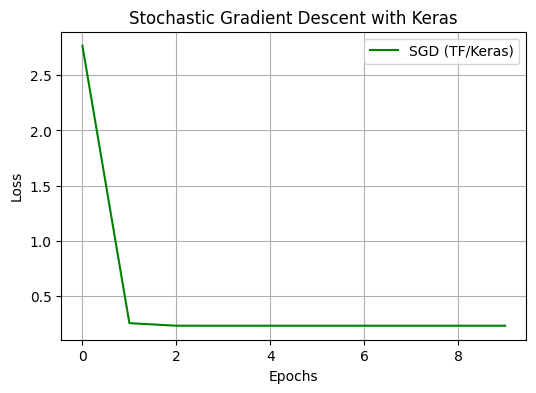

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
X = np.random.randn(100, 3)                        # Input features: (100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])          # True weights: (3, 1)
y = X @ true_W + 0.5 * np.random.randn(100, 1)     # Target with noise: (100, 1)

# Build a simple linear regression model in Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(3,), use_bias=True)
])

# Compile the model with SGD optimizer and MSE loss
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mse'
)

# Define custom callback to track loss manually after each epoch
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])

loss_history = LossHistory()

# Train the model using batch_size=1 to simulate SGD (one sample at a time)
history = model.fit(
    X, y,
    epochs=10,
    batch_size=1,              # ← this ensures SGD (one sample per update)
    verbose=0,                 # Set to 1 for logs
    callbacks=[loss_history]
)

# Plot loss
plt.figure(figsize=(6,4))
plt.plot(loss_history.losses, label='SGD (TF/Keras)', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent with Keras')
plt.legend()
plt.grid(True)
plt.show()


f. Adam Optimizer

Explanation: Combines momentum and adaptive learning rate. One of the most popular optimizers in deep learning.



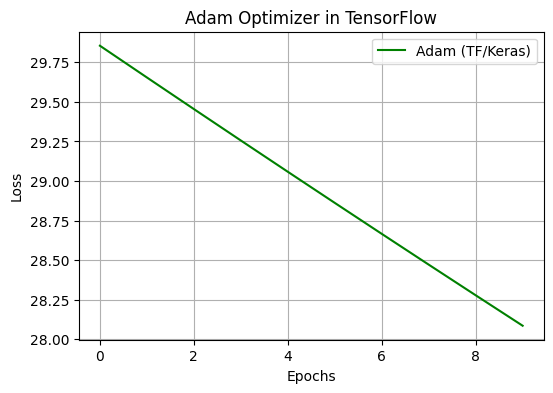

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate synthetic data
X = np.random.randn(100, 3)
true_W = np.array([[2.0], [-3.5], [1.0]])
y = X @ true_W + 0.5 * np.random.randn(100, 1)

# Build the linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(3,), use_bias=True)
])

# Compile with Adam optimizer and MSE loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

# Callback to track loss manually
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs["loss"])

loss_history = LossHistory()

# Train the model
model.fit(
    X, y,
    epochs=10,
    batch_size=100,  # Full batch = like your manual version
    verbose=0,
    callbacks=[loss_history]
)

# Plotting the loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_history.losses, label='Adam (TF/Keras)', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Adam Optimizer in TensorFlow')
plt.legend()
plt.grid(True)
plt.show()
